<a href="https://colab.research.google.com/github/Samsonasumu/PYTHON-DATA-SCIENCE/blob/main/KAGGLE_SUBMISSION_Updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, StratifiedKFold, StratifiedShuffleSplit

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBClassifier

from sklearn.metrics import mean_absolute_error, accuracy_score, classification_report, confusion_matrix

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv("/content/drive/MyDrive/train-test-submission/Assignment3-Healthcare-Dataset.csv")
sub = pd.read_csv("/content/drive/MyDrive/train-test-submission/Assignment3-Kaggle-Submission-Random-Sample.csv")
test= pd.read_csv("/content/drive/MyDrive/train-test-submission/Assignment3-Unknown-Dataset.csv")

In [4]:
print(test.shape)
print(df.shape)

(11796, 26)
(47180, 27)


In [5]:
df.head()

,gender,age,LOSdays,admit_type,admit_location,AdmitDiagnosis,insurance,religion,marital_status,ethnicity,...,NumMicroLabs,NumNotes,NumOutput,NumRx,NumProcEvents,NumTransfers,NumChartEvents,ExpiredHospital,TotalNumInteract,LOSgroupNum
0,F,35.0,6,1,CLINIC REFERRAL/PREMATURE,DIABETIC KETOACIDOSIS,3,PROTESTANT QUAKER,DIVORCED,WHITE,...,4,0,5,15,7,4,399,0,494,NaN
1,M,59.0,4,1,EMERGENCY ROOM ADMIT,UPPER GI BLEED,3,NOT SPECIFIED,SINGLE,WHITE,...,5,6,5,7,4,5,373,0,466,NaN
2,F,73.0,7,1,EMERGENCY ROOM ADMIT,BOWEL OBSTRUCTION,3,JEWISH,MARRIED,WHITE,...,5,1,9,12,0,7,526,0,603,NaN
3,M,60.0,5,1,TRANSFER FROM HOSP/EXTRAM,CORONARY ARTERY DISEASE,3,CATHOLIC,MARRIED,WHITE,...,3,2,16,25,14,10,555,0,680,NaN
4,F,54.0,4,0,PHYS REFERRAL/NORMAL DELI,RENAL MASS LEFT/SDA,3,EPISCOPALIAN,MARRIED,WHITE,...,0,0,8,9,5,4,449,0,509,NaN


In [6]:
df.shape
df.columns
#test.columns
#sub.columns

Index(['gender', 'age', 'LOSdays', 'admit_type', 'admit_location',
       'AdmitDiagnosis', 'insurance', 'religion', 'marital_status',
       'ethnicity', 'NumCallouts', 'NumDiagnosis', 'NumProcs',
       'AdmitProcedure', 'NumCPTevents', 'NumInput', 'NumLabs', 'NumMicroLabs',
       'NumNotes', 'NumOutput', 'NumRx', 'NumProcEvents', 'NumTransfers',
       'NumChartEvents', 'ExpiredHospital', 'TotalNumInteract', 'LOSgroupNum'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47180 entries, 0 to 47179
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            47180 non-null  object 
 1   age               44841 non-null  float64
 2   LOSdays           47180 non-null  int64  
 3   admit_type        47180 non-null  int64  
 4   admit_location    47180 non-null  object 
 5   AdmitDiagnosis    47160 non-null  object 
 6   insurance         47180 non-null  int64  
 7   religion          46808 non-null  object 
 8   marital_status    39001 non-null  object 
 9   ethnicity         47180 non-null  object 
 10  NumCallouts       44810 non-null  float64
 11  NumDiagnosis      47180 non-null  int64  
 12  NumProcs          47180 non-null  int64  
 13  AdmitProcedure    47180 non-null  object 
 14  NumCPTevents      47180 non-null  int64  
 15  NumInput          47180 non-null  int64  
 16  NumLabs           47180 non-null  int64 

In [8]:
 #finding the number of missing values
 df.isna().sum()


gender                  0
age                  2339
LOSdays                 0
admit_type              0
admit_location          0
AdmitDiagnosis         20
insurance               0
religion              372
marital_status       8179
ethnicity               0
NumCallouts          2370
NumDiagnosis            0
NumProcs                0
AdmitProcedure          0
NumCPTevents            0
NumInput                0
NumLabs                 0
NumMicroLabs            0
NumNotes                0
NumOutput               0
NumRx                   0
NumProcEvents           0
NumTransfers            0
NumChartEvents          0
ExpiredHospital         0
TotalNumInteract        0
LOSgroupNum         42447
dtype: int64

In [9]:
df.columns

Index(['gender', 'age', 'LOSdays', 'admit_type', 'admit_location',
       'AdmitDiagnosis', 'insurance', 'religion', 'marital_status',
       'ethnicity', 'NumCallouts', 'NumDiagnosis', 'NumProcs',
       'AdmitProcedure', 'NumCPTevents', 'NumInput', 'NumLabs', 'NumMicroLabs',
       'NumNotes', 'NumOutput', 'NumRx', 'NumProcEvents', 'NumTransfers',
       'NumChartEvents', 'ExpiredHospital', 'TotalNumInteract', 'LOSgroupNum'],
      dtype='object')

In [10]:
#deleting the LOSgroupNum since it contains many null
#df.drop(columns="LOSgroupNum", inplace=True)

#fill categorical with the mode
df['marital_status']=df['marital_status'].fillna(df['marital_status'].mode()[0])
df['religion']=df['religion'].fillna(df['religion'].mode()[0])


df['NumCallouts']=df['NumCallouts'].fillna(df['NumCallouts'].mean())
df['age']=df['age'].fillna(df['age'].mean())

In [11]:
df.drop(['admit_location', 'AdmitDiagnosis','LOSgroupNum','ethnicity','AdmitProcedure', 'religion'], axis=1, inplace=True)


In [12]:
df.columns

Index(['gender', 'age', 'LOSdays', 'admit_type', 'insurance', 'marital_status',
       'NumCallouts', 'NumDiagnosis', 'NumProcs', 'NumCPTevents', 'NumInput',
       'NumLabs', 'NumMicroLabs', 'NumNotes', 'NumOutput', 'NumRx',
       'NumProcEvents', 'NumTransfers', 'NumChartEvents', 'ExpiredHospital',
       'TotalNumInteract'],
      dtype='object')

In [13]:
df = df.dropna()


In [14]:
 #finding the number of missing values
 df.isna().sum()


gender              0
age                 0
LOSdays             0
admit_type          0
insurance           0
marital_status      0
NumCallouts         0
NumDiagnosis        0
NumProcs            0
NumCPTevents        0
NumInput            0
NumLabs             0
NumMicroLabs        0
NumNotes            0
NumOutput           0
NumRx               0
NumProcEvents       0
NumTransfers        0
NumChartEvents      0
ExpiredHospital     0
TotalNumInteract    0
dtype: int64

<ipython-input-15-7ee8cfa8876b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)


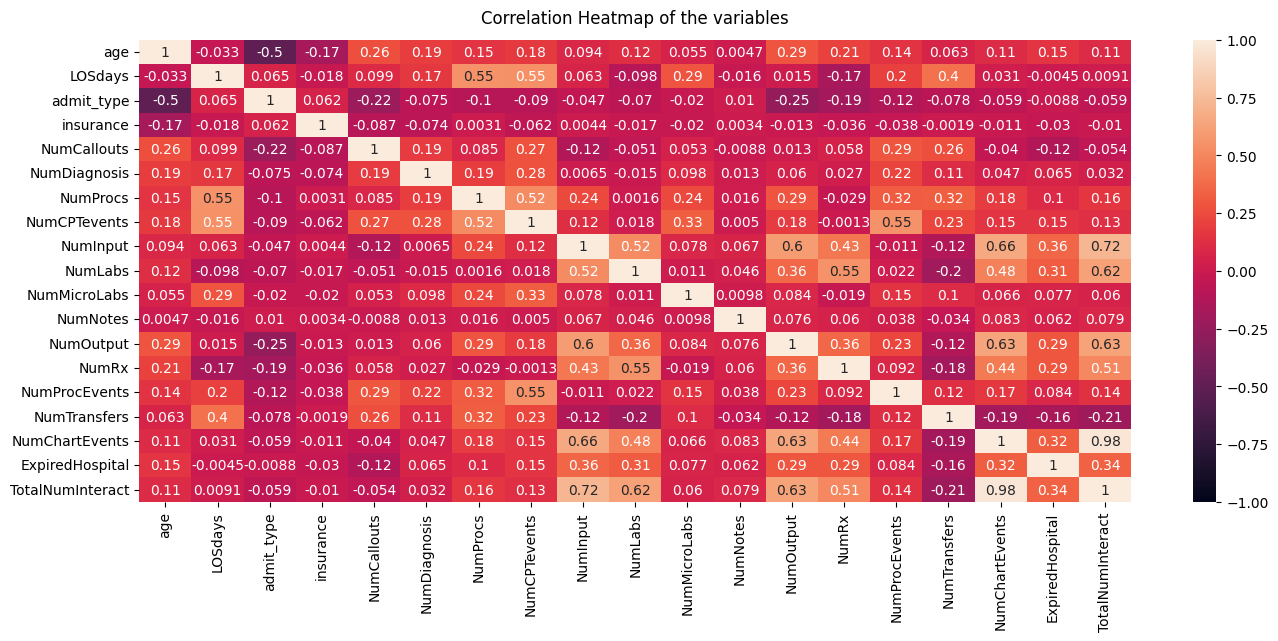

In [15]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap of the variables', fontdict={'fontsize':12}, pad=12);

In [16]:
# we need to drop some independent variables that correlate highly with themselselves
#FROM THE matrix there seems to be high correlation of numchartEvents with totalnumInteract of 0.98 and also  numchartEvents with numinput
#there is also a high corelation between LosDays with numProcess , numEvents and LosGroup to avoid multicollinearity, we will drop them
#ie drop    numchartEvents and LosDays


<Axes: xlabel='marital_status', ylabel='count'>

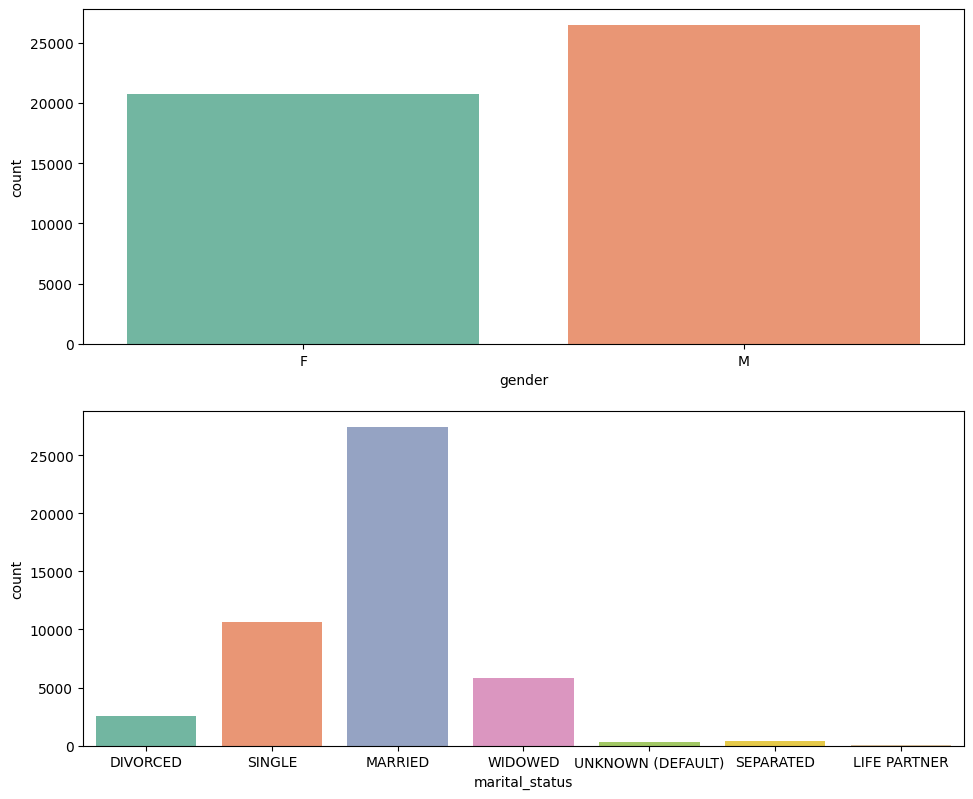

In [17]:
plt.figure(figsize = (25,20))

plt.subplot(4,2,1)
sns.countplot(x = 'gender', palette = 'Set2', data = df)


plt.subplot(4,2,3)
sns.countplot(x = 'marital_status', palette = 'Set2', data = df)

In [18]:
df.isnull().sum()

gender              0
age                 0
LOSdays             0
admit_type          0
insurance           0
marital_status      0
NumCallouts         0
NumDiagnosis        0
NumProcs            0
NumCPTevents        0
NumInput            0
NumLabs             0
NumMicroLabs        0
NumNotes            0
NumOutput           0
NumRx               0
NumProcEvents       0
NumTransfers        0
NumChartEvents      0
ExpiredHospital     0
TotalNumInteract    0
dtype: int64

## test data preprocessing

In [19]:
df.columns

Index(['gender', 'age', 'LOSdays', 'admit_type', 'insurance', 'marital_status',
       'NumCallouts', 'NumDiagnosis', 'NumProcs', 'NumCPTevents', 'NumInput',
       'NumLabs', 'NumMicroLabs', 'NumNotes', 'NumOutput', 'NumRx',
       'NumProcEvents', 'NumTransfers', 'NumChartEvents', 'ExpiredHospital',
       'TotalNumInteract'],
      dtype='object')

In [20]:
test.isnull().sum()

gender                  0
age                   609
LOSdays                 0
admit_type              0
admit_location          0
AdmitDiagnosis          5
insurance               0
religion               86
marital_status       1949
ethnicity               0
NumCallouts           578
NumDiagnosis            0
NumProcs                0
AdmitProcedure          0
NumCPTevents            0
NumInput                0
NumLabs                 0
NumMicroLabs            0
NumNotes                0
NumOutput               0
NumRx                   0
NumProcEvents           0
NumTransfers            0
NumChartEvents          0
TotalNumInteract        0
LOSgroupNum         10631
dtype: int64

In [21]:
#deleting the LOSgroupNum since it contains many null
#df.drop(columns="LOSgroupNum", inplace=True)

#fill categorical with the mode
test['marital_status']=test['marital_status'].fillna(test['marital_status'].mode()[0])
test['religion']=test['religion'].fillna(test['religion'].mode()[0])


test['NumCallouts']=test['NumCallouts'].fillna(test['NumCallouts'].mean())
test['age']=test['age'].fillna(test['age'].mean())

In [22]:
test.drop(['admit_location', 'AdmitDiagnosis','LOSgroupNum','ethnicity','AdmitProcedure', 'religion'], axis=1, inplace=True)


In [23]:
test = test.dropna()


In [24]:
print("test shape",test.shape)
print("train shape",df.shape)

test shape (11796, 20)
train shape (47180, 21)


In [25]:
test.columns

Index(['gender', 'age', 'LOSdays', 'admit_type', 'insurance', 'marital_status',
       'NumCallouts', 'NumDiagnosis', 'NumProcs', 'NumCPTevents', 'NumInput',
       'NumLabs', 'NumMicroLabs', 'NumNotes', 'NumOutput', 'NumRx',
       'NumProcEvents', 'NumTransfers', 'NumChartEvents', 'TotalNumInteract'],
      dtype='object')

## one hot encoding

In [26]:
#One Hot Encoding
# Variables to apply one hot encoding
list = ["gender", "marital_status"]
df_clean = pd.get_dummies(df, columns =list, drop_first = True)
test_clean = pd.get_dummies(test, columns =list, drop_first = True)



In [27]:
# Split the train dataset into features and target variable
X_train = df_clean.drop(['ExpiredHospital'], axis=1)
y_train = df_clean['ExpiredHospital']


In [28]:
# Normalizing the all the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_test_scaled = scaler.fit_transform(test_clean)
X_train_scaled = scaler.fit_transform(X_train)

#scaled_train_data
#x_train_scaled = df_clean.columns[df_clean.columns != "ExpiredHospital"]
#X_train = scaler.fit_transform(df_clean[x_train_scaled])

## logistic regression

In [29]:
# K-fold splits

#cv = StratifiedShuffleSplit(n_splits=10, test_size=.30, random_state=15)

In [30]:
# Defining all the parameters
#params = {
 #   'penalty': ['l1','l2'],
  #  'C': [4,5,6,7,8,9,10]
#}

# Building model
#logreg = LogisticRegression(solver='liblinear')

# Parameter estimating using GridSearch
#grid = GridSearchCV(logreg, param_grid=params, scoring='accuracy', n_jobs =-1, cv=cv, verbose=1)

# Fitting the model
#grid.fit(X_train_scaled, y_train)


In [31]:
#logreg_grid_val_score = grid.best_score_
#print('Best Score:', logreg_grid_val_score)
#print('Best Params:', grid.best_params_)
#print('Best Estimator:', grid.best_estimator_)

In [32]:
#logreg_grid = grid.best_estimator_
#y_pred = logreg_grid.predict(X_test_scaled)


## Create a Random Forest Classifier


## *RandomForestClassifier *

In [33]:
# Split the train dataset into features and target variable
X_train = df_clean.drop(['ExpiredHospital'], axis=1)
y_train = df_clean['ExpiredHospital']

# Split the dataset into training and testing sets
X_train_, X_test_, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=50)

# Train the classifier using the training data
clf.fit(X_train_, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test_)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy randon forest classifier: ", accuracy)

Accuracy randon forest classifier:  0.9367316659601526


In [35]:
# Necessary imports
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

# Creating the hyperparameter grid
param_dist = {"max_depth": [3, None],
			"max_features": randint(1, 9),
			"min_samples_leaf": randint(1, 9),
			"criterion": ["gini", "entropy"]}
# Instantiating RandomizedSearchCV object
rcv = RandomizedSearchCV(clf, param_dist, cv = 5)

rcv.fit(X_train_, y_train)
# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(rcv.best_params_))
print("Best score is {}".format(rcv.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': None, 'max_features': 5, 'min_samples_leaf': 2}
Best score is 0.9368111766945271


## support vector machine

In [37]:
svm_model = SVC()
svm_model.fit(X_train_, y_train)

SVC()

In [38]:
test_predictions = svm_model.predict(X_test_)


In [39]:
accuracy = accuracy_score(test_predictions, y_pred)
print("Accuracy svc: ", accuracy)

Accuracy svc:  0.9705383637134379


# DecisionTreeClassifier

In [40]:
# Create the decision tree classifier
dt = DecisionTreeClassifier()

# Train the classifier on the training set
dt.fit(X_train_, y_train)

# Make predictions on the testing set
y_pred_dt = clf.predict(X_test_)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_pred_dt, y_pred)
print("Accuracy descion tree:", accuracy)

Accuracy descion tree: 1.0


In [49]:
# Extract feature importances from the decision tree
feature_importances = dt.feature_importances_

# Sort feature importances in descending order
sorted_feature_importances = sorted(zip(feature_importances, X_train_.columns), reverse=True)

# Print the top 10 most important features
print("Top 10 most important features:")
for importance, feature in sorted_feature_importances[:10]:
    print(f"{feature}: {importance}")


Top 10 most important features:
TotalNumInteract: 0.2652344652356829
NumLabs: 0.12894623196568825
age: 0.07540820825902396
NumInput: 0.0688257789196645
NumCPTevents: 0.0506152687359865
NumMicroLabs: 0.045295707177262175
LOSdays: 0.0392133089470814
NumDiagnosis: 0.037984247355895694
NumOutput: 0.03732104042173031
NumChartEvents: 0.03666868078600401


<Axes: >

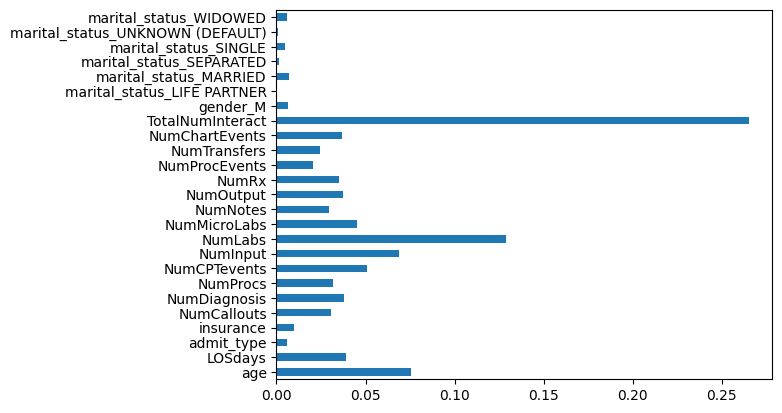

In [50]:
(pd.Series(dt.feature_importances_, index=X_train_.columns).plot(kind='barh'))


## KNeighborsClassifier

In [41]:
# Create KNN classifier with k=3
knn = KNeighborsClassifier(n_neighbors=3)

# Train the model on the training set
knn.fit(X_train_, y_train)

# Make predictions on the testing set
y_pred_knn = knn.predict(X_test_)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_pred_knn, y_pred)
print("Accuracy knn:", accuracy)

Accuracy knn: 0.9612123781263248


## submisssion to kaggle

In [60]:
test_clean.head(1)

,age,LOSdays,admit_type,insurance,NumCallouts,NumDiagnosis,NumProcs,NumCPTevents,NumInput,NumLabs,...,NumTransfers,NumChartEvents,TotalNumInteract,gender_M,marital_status_LIFE PARTNER,marital_status_MARRIED,marital_status_SEPARATED,marital_status_SINGLE,marital_status_UNKNOWN (DEFAULT),marital_status_WIDOWED
0,48.0,12,1,3,0.0,9,2,10,11,33,...,4,286,344,0,0,0,0,1,0,0


In [ ]:
y_pred_dtY = clf.predict(test_clean)


In [58]:

# Create submission file
submission_df = pd.DataFrame({'patient_id': sub['row ID'], 'ExpiredHospital': y_pred_dtY})
submission_df.to_csv('submissiony.csv', index=False)
